### PARTE01

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Generamos bits y bases aleatorias
def generar_bits_bases(n=1000, seed=42):
    random.seed(seed)
    bits = [random.randint(0, 1) for _ in range(n)]
    bases = [random.choice(['R', 'D']) for _ in range(n)]
    return bits, bases
# Guardar .txt
def guardar_archivo(nombre, bits, bases):
    with open(nombre, 'w') as f:
        f.write('Bit Base\n')
        for b, bs in zip(bits, bases):
            f.write(f'{b} {bs}\n')
# Comparar bases
def comparar_bases(bits_a, bases_a, bases_b):
    clave = []
    for bit, ba, bb in zip(bits_a, bases_a, bases_b):
        if ba == bb:
            clave.append(bit)
    return clave
# Verificar error con un n
def verificar_error(clave_a, clave_b, n=50):
    muestra_a = clave_a[:n]
    muestra_b = clave_b[:n]
    errores = sum(a != b for a, b in zip(muestra_a, muestra_b))
    return errores / n


# Funcion para Eve
def eve_intercept(bits_alice, bases_alice, seed=42):
    random.seed(seed)
    n = len(bits_alice)
    eve_bases = [random.choice(['R', 'D']) for _ in range(n)]
    eve_bits = [bit if ba == be else random.randint(0, 1)
                for bit, ba, be in zip(bits_alice, bases_alice, eve_bases)]
    return eve_bits, eve_bases



In [3]:
n_total=1000
n_comparar=100

In [5]:
alice_bits, alice_bases = generar_bits_bases(n=n_total,seed=2025+10+28)
bob_bases = generar_bits_bases(n=n_total, seed=2025+10+28)[1]

guardar_archivo('alice_bb84.txt', alice_bits, alice_bases)
guardar_archivo('bob_bb84_bases.txt', [0]*n_total, bob_bases)

In [6]:
clave_compartida = comparar_bases(alice_bits, alice_bases, bob_bases)
tasa_error = verificar_error(clave_compartida, clave_compartida , n=n_comparar)

print('Longitud clave compartida:', len(clave_compartida))
print('QBER:', tasa_error)

# ------------------------------------------------
n_validos = len(clave_compartida)
n_unos = sum(clave_compartida)
n_ceros = n_validos - n_unos

print(f'Bits totales: {n_total}')
print(f'Bits válidos (bases coincidentes): {n_validos}')
print(f'Unos: {n_unos}  ({n_unos/n_validos*100:.1f}%)')
print(f'Ceros: {n_ceros}  ({n_ceros/n_validos*100:.1f}%)')


Longitud clave compartida: 1000
QBER: 0.0
Bits totales: 1000
Bits válidos (bases coincidentes): 1000
Unos: 521  (52.1%)
Ceros: 479  (47.9%)


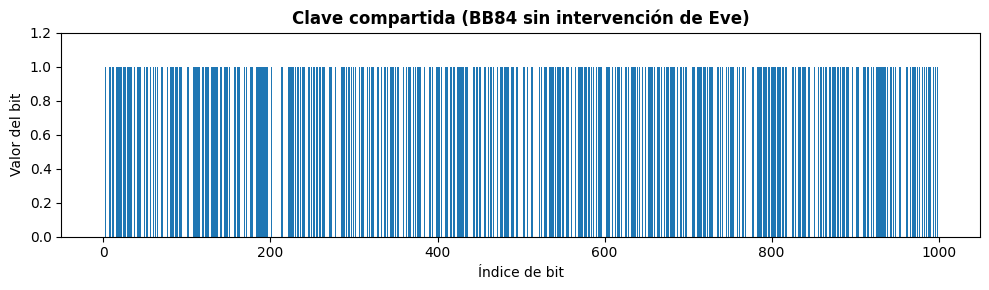

In [7]:
# --- Gráfico de barras ---
plt.figure(figsize=(10, 3))
plt.bar(range(len(clave_compartida)), clave_compartida, color='tab:blue', width=1.0)
plt.title('Clave compartida (BB84 sin intervención de Eve)', fontweight='bold')
plt.xlabel('Índice de bit')
plt.ylabel('Valor del bit')
plt.ylim(0, 1.2)
plt.tight_layout()
plt.show()

In [8]:
# Data frame
df = pd.DataFrame({
    "Bit_Alice": alice_bits,
    "Base_Alice": alice_bases,
    "Base_Bob": bob_bases
})

# Coincidencia de bases
df["Coinciden_Bases"] = df["Base_Alice"] == df["Base_Bob"]

# Bit compartido: solo si las bases coinciden, en caso contrario vacío
df["Bit_Compartido"] = [
    bit if coinc else None
    for bit, coinc in zip(alice_bits, df["Coinciden_Bases"])
]

# Guardar CSV
df.to_csv("resultados_bb84_parte1.csv", index=False)

print(df.head())
print("\nArchivo 'resultados_bb84_parte1.csv' generado correctamente.")

   Bit_Alice Base_Alice Base_Bob  Coinciden_Bases  Bit_Compartido
0          0          R        R             True               0
1          0          D        D             True               0
2          1          D        D             True               1
3          0          R        R             True               0
4          0          D        D             True               0

Archivo 'resultados_bb84_parte1.csv' generado correctamente.


---

### PARTE02

In [ ]:
guardar_archivo('alice_bb84.txt', alice_bits, alice_bases)
guardar_archivo('bob_bb84_bases.txt', [0]*n_total, bob_bases)

eve_bits, eve_bases = eve_intercept(alice_bits, alice_bases, seed=123)
guardar_archivo('eve_bb84_bases.txt', eve_bits, eve_bases)



In [10]:
# --- Bob mide los bits que Eve le reenvió ---
clave_bob = comparar_bases(eve_bits, eve_bases, bob_bases)
clave_alice = comparar_bases(alice_bits, alice_bases, bob_bases)


In [11]:
# --- Cálculo del QBER ---
tasa_error = verificar_error(clave_alice, clave_bob, n=n_comparar)

# --- Métricas con intervención de Eve ---
print('Longitud clave compartida:', len(clave_bob))
print('QBER:', tasa_error)

# ------------------------------------------------
n_validos = len(clave_bob)
n_unos = sum(clave_bob)
n_ceros = n_validos - n_unos

print(f'Bits totales: {n_total}')
print(f'Bits válidos (bases coincidentes): {n_validos}')
print(f'Unos: {n_unos}  ({n_unos/n_validos*100:.1f}%)')
print(f'Ceros: {n_ceros}  ({n_ceros/n_validos*100:.1f}%)')


Longitud clave compartida: 517
QBER: 0.51
Bits totales: 1000
Bits válidos (bases coincidentes): 517
Unos: 273  (52.8%)
Ceros: 244  (47.2%)


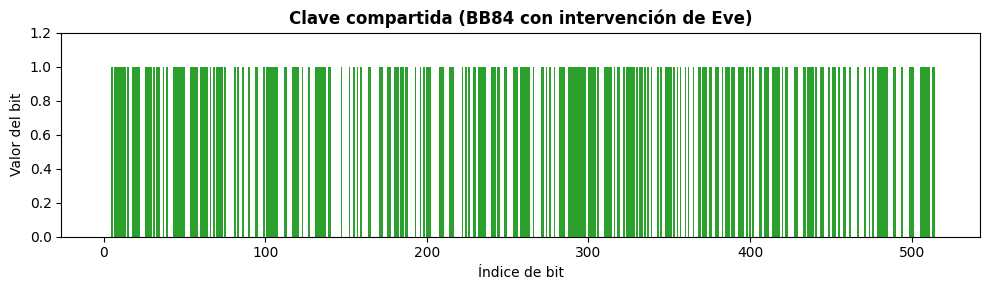

In [12]:
plt.figure(figsize=(10, 3))
plt.bar(range(len(clave_bob)), clave_bob, color='tab:green', width=1.0)
plt.title('Clave compartida (BB84 con intervención de Eve)', fontweight='bold')
plt.xlabel('Índice de bit')
plt.ylabel('Valor del bit')
plt.ylim(0, 1.2)
plt.tight_layout()
plt.show()

In [13]:
# Data frame
df = pd.DataFrame({
    "Bit_Alice": alice_bits,
    "Base_Alice": alice_bases,
    "Bit_Eve": eve_bits,
    "Base_Eve": eve_bases,
    "Base_Bob": bob_bases
})

df["Coinciden_Bases"] = df["Base_Eve"] == df["Base_Bob"]

df["Bit_Bob"] = [
    b if coinc else None
    for b, coinc in zip(eve_bits, df["Coinciden_Bases"])
]

# Guardar CSV
df.to_csv("resultados_bb84_parte2.csv", index=False)
print(df.head())
print("\nArchivo 'resultados_bb84_parte2.csv' generado correctamente.")


   Bit_Alice Base_Alice  Bit_Eve Base_Eve Base_Bob  Coinciden_Bases  Bit_Bob
0          0          R        0        R        R             True      0.0
1          0          D        0        D        D             True      0.0
2          1          D        1        R        D            False      NaN
3          0          R        0        D        R            False      NaN
4          0          D        0        D        D             True      0.0

Archivo 'resultados_bb84_parte2.csv' generado correctamente.
